In [1]:
require(car)

Loading required package: car

Loading required package: carData



In [2]:
EIA <- read.csv('EIA.csv')
EIA$impact <- as.factor(EIA$impact)
EIA$MonthOfYear <- as.factor(EIA$MonthOfYear)
EIA$Year <- as.factor(EIA$Year)
attach(EIA)

### Initial model fitting

Fit a Poisson-based GLM using a square-root link function, 7 covariates and 2 year-based interaction terms. Use
the following code:

In [3]:
fit.poisSqrt <- glm(count ~ tidestate + observationhour + DayOfMonth + MonthOfYear +
    Year + x.pos + y.pos + Year:x.pos + Year:y.pos, data = EIA, family = poisson(link = 'sqrt')
)

In [134]:
summary(fit.poisSqrt)


Call:
glm(formula = count ~ tidestate + observationhour + DayOfMonth + 
    MonthOfYear + Year + x.pos + y.pos + Year:x.pos + Year:y.pos, 
    family = poisson(link = "sqrt"), data = EIA)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8160  -1.6854  -1.3654  -0.9634  29.4126  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)      2.144e+00  2.904e-02  73.802  < 2e-16 ***
tidestateFLOOD   2.231e-03  7.305e-03   0.305 0.760103    
tidestateSLACK   1.443e-01  7.645e-03  18.879  < 2e-16 ***
observationhour -5.574e-02  9.849e-04 -56.598  < 2e-16 ***
DayOfMonth      -4.792e-05  3.936e-04  -0.122 0.903117    
MonthOfYear2     1.483e-01  1.651e-02   8.986  < 2e-16 ***
MonthOfYear3     7.261e-02  1.729e-02   4.200 2.66e-05 ***
MonthOfYear4    -1.026e-01  2.390e-02  -4.290 1.79e-05 ***
MonthOfYear5    -8.897e-02  2.418e-02  -3.680 0.000234 ***
MonthOfYear6    -1.125e-01  2.514e-02  -4.476 7.61e-06 ***
MonthOfYear7    -1.143e-01  2.642

In [5]:
fit.pois <- glm(count ~ tidestate + observationhour + DayOfMonth + MonthOfYear + Year +
x.pos + y.pos + Year:x.pos + Year:y.pos, data = EIA, family = poisson(link="log"))

Refit the Poisson model with a log link and an offset term (using area as an effort term) and check for
collinearity using the VIF function.

In [6]:
fit.pois.offset <- glm(count ~ tidestate + observationhour + DayOfMonth + MonthOfYear + Year +
x.pos + y.pos + Year:x.pos + Year:y.pos, data = EIA, family = poisson(link="log"), offset=log(area))

In [7]:
vif(fit.pois.offset)

,GVIF,Df,GVIF^(1/(2*Df))
tidestate,1.097953,2,1.023637
observationhour,1.188096,1,1.089998
DayOfMonth,1.367343,1,1.169335
MonthOfYear,8.483341,11,1.102066
Year,118.469558,3,2.216160
x.pos,3.015281,1,1.736456
y.pos,3.015205,1,1.736434
Year:x.pos,41.896764,3,1.863646
Year:y.pos,10.277175,3,1.474503


### 1.3 Model Selection
Compare the AIC scores for the fit.pois, fit.poisSqrt, and fit.poisOff models

In [8]:
AIC(fit.pois.offset, fit.pois, fit.poisSqrt)

,df,AIC
,<dbl>,<dbl>
fit.pois.offset,27,158505.4
fit.pois,27,166593.1
fit.poisSqrt,27,166715.0


Carry out automated stepwise selection on the fit.poisOff governed by the AIC and BIC criteria:
call these new models step.poisOff and step.poisOff_BIC respectively (as before set direction =
"both")

In [9]:
step.poisOff = step(fit.pois.offset, direction="both")

Start:  AIC=158505.4
count ~ tidestate + observationhour + DayOfMonth + MonthOfYear + 
    Year + x.pos + y.pos + Year:x.pos + Year:y.pos

                  Df Deviance    AIC
- DayOfMonth       1   142926 158504
<none>                 142926 158505
- Year:y.pos       3   142991 158564
- Year:x.pos       3   143000 158573
- tidestate        2   143449 159025
- MonthOfYear     11   143625 159182
- observationhour  1   145955 161533

Step:  AIC=158503.5
count ~ tidestate + observationhour + MonthOfYear + Year + x.pos + 
    y.pos + Year:x.pos + Year:y.pos

                  Df Deviance    AIC
<none>                 142926 158504
+ DayOfMonth       1   142926 158505
- Year:y.pos       3   142991 158562
- Year:x.pos       3   143000 158571
- tidestate        2   143449 159023
- MonthOfYear     11   143626 159182
- observationhour  1   145962 161538


In [10]:
step.poisOff_BIC = step(fit.pois.offset, direction="both", k=log(nrow(EIA)))

Start:  AIC=158727.7
count ~ tidestate + observationhour + DayOfMonth + MonthOfYear + 
    Year + x.pos + y.pos + Year:x.pos + Year:y.pos

                  Df Deviance    AIC
- DayOfMonth       1   142926 158718
<none>                 142926 158728
- Year:y.pos       3   142991 158762
- Year:x.pos       3   143000 158771
- tidestate        2   143449 159230
- MonthOfYear     11   143625 159314
- observationhour  1   145955 161747

Step:  AIC=158717.6
count ~ tidestate + observationhour + MonthOfYear + Year + x.pos + 
    y.pos + Year:x.pos + Year:y.pos

                  Df Deviance    AIC
<none>                 142926 158718
+ DayOfMonth       1   142926 158728
- Year:y.pos       3   142991 158752
- Year:x.pos       3   143000 158761
- tidestate        2   143449 159220
- MonthOfYear     11   143626 159305
- observationhour  1   145962 161744


In [11]:
step.poisOff_BIC


Call:  glm(formula = count ~ tidestate + observationhour + MonthOfYear + 
    Year + x.pos + y.pos + Year:x.pos + Year:y.pos, family = poisson(link = "log"), 
    data = EIA, offset = log(area))

Coefficients:
    (Intercept)   tidestateFLOOD   tidestateSLACK  observationhour  
      2.291e+00       -2.834e-02        2.546e-01       -1.040e-01  
   MonthOfYear2     MonthOfYear3     MonthOfYear4     MonthOfYear5  
      3.759e-01        1.684e-01       -1.887e-01       -2.087e-01  
   MonthOfYear6     MonthOfYear7     MonthOfYear8     MonthOfYear9  
     -2.242e-01       -1.762e-01        7.763e-02       -2.693e-01  
  MonthOfYear10    MonthOfYear11    MonthOfYear12           Year10  
      4.215e-02        2.710e-02        5.645e-02        4.135e-02  
         Year11           Year12            x.pos            y.pos  
     -4.278e-01       -6.509e-01        2.536e-04        1.111e-04  
   Year10:x.pos     Year11:x.pos     Year12:x.pos     Year10:y.pos  
      8.063e-05       -4.016e-

In [12]:
step.poisOff


Call:  glm(formula = count ~ tidestate + observationhour + MonthOfYear + 
    Year + x.pos + y.pos + Year:x.pos + Year:y.pos, family = poisson(link = "log"), 
    data = EIA, offset = log(area))

Coefficients:
    (Intercept)   tidestateFLOOD   tidestateSLACK  observationhour  
      2.291e+00       -2.834e-02        2.546e-01       -1.040e-01  
   MonthOfYear2     MonthOfYear3     MonthOfYear4     MonthOfYear5  
      3.759e-01        1.684e-01       -1.887e-01       -2.087e-01  
   MonthOfYear6     MonthOfYear7     MonthOfYear8     MonthOfYear9  
     -2.242e-01       -1.762e-01        7.763e-02       -2.693e-01  
  MonthOfYear10    MonthOfYear11    MonthOfYear12           Year10  
      4.215e-02        2.710e-02        5.645e-02        4.135e-02  
         Year11           Year12            x.pos            y.pos  
     -4.278e-01       -6.509e-01        2.536e-04        1.111e-04  
   Year10:x.pos     Year11:x.pos     Year12:x.pos     Year10:y.pos  
      8.063e-05       -4.016e-

In [15]:
print(Anova(step.poisOff_BIC))

Analysis of Deviance Table (Type II tests)

Response: count
                LR Chisq Df Pr(>Chisq)    
tidestate          523.1  2  < 2.2e-16 ***
observationhour   3036.2  1  < 2.2e-16 ***
MonthOfYear        700.2 11  < 2.2e-16 ***
Year              1234.4  3  < 2.2e-16 ***
x.pos             3658.5  1  < 2.2e-16 ***
y.pos             1411.8  1  < 2.2e-16 ***
Year:x.pos          73.8  3  6.555e-16 ***
Year:y.pos          64.7  3  5.783e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [19]:
require(MuMIn)
options(na.action='na.fail')
head(dredge(step.poisOff_BIC))

Fixed term is "(Intercept)"



,(Intercept),MonthOfYear,observationhour,tidestate,x.pos,y.pos,Year,x.pos:Year,y.pos:Year,df,logLik,AICc,delta,weight
,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<mdl.wght>
256,2.291000,+,-0.1039732,+,0.0002535740,0.0001111467,+,+,+,26,-79225.76,158503.6,0.00000,1.000000e+00
128,2.295217,+,-0.1039732,+,0.0002549748,0.0001129982,+,+,NA,23,-79258.12,158562.3,58.70032,1.792208e-13
192,2.285284,+,-0.1039732,+,0.0002507836,0.0001100753,+,NA,+,23,-79262.66,158571.4,67.78779,1.905758e-15
64,2.288230,+,-0.1039732,+,0.0002507893,0.0001129377,+,NA,NA,20,-79278.54,158597.1,93.53356,4.891528e-21
252,2.331694,+,-0.1047747,NA,0.0002535740,0.0001111467,+,+,+,24,-79487.32,159022.7,519.09748,1.902889e-113
124,2.335910,+,-0.1047747,NA,0.0002549748,0.0001129982,+,+,NA,21,-79519.67,159081.4,577.79867,3.408898e-126


In [137]:
predictions = data.frame(
    tidestate=as.factor("EBB"),
    observationhour=10,
    MonthOfYear=c(as.factor("1"), as.factor("5")),
    Year=as.factor("11"),
    x.pos=-2061,
    y.pos=-1158,
    area=mean(EIA$area)
)
predictions = predict(step.poisOff_BIC, predictions, type="response")
ratio = predictions[2]/predictions[1]
print(paste("Prediction", round(predictions[1],3)))
print(paste("Ratio", round(ratio, 3)))

[1] "Prediction 1.112"
[1] "Ratio 0.812"


In [135]:
step.poisOffOD = update(step.poisOff_BIC, family=quasipoisson)
round(summary(step.poisOffOD)$dispersion, 3)

[1] 15.11

In [32]:
summary(step.poisOff_BIC)


Call:
glm(formula = count ~ tidestate + observationhour + MonthOfYear + 
    Year + x.pos + y.pos + Year:x.pos + Year:y.pos, family = poisson(link = "log"), 
    data = EIA, offset = log(area))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.2819  -1.6583  -1.2915  -0.8328  28.4010  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)      2.291e+00  4.657e-02  49.198  < 2e-16 ***
tidestateFLOOD  -2.834e-02  1.390e-02  -2.039   0.0415 *  
tidestateSLACK   2.546e-01  1.378e-02  18.471  < 2e-16 ***
observationhour -1.040e-01  1.937e-03 -53.673  < 2e-16 ***
MonthOfYear2     3.759e-01  2.933e-02  12.816  < 2e-16 ***
MonthOfYear3     1.684e-01  3.086e-02   5.457 4.85e-08 ***
MonthOfYear4    -1.887e-01  4.031e-02  -4.681 2.85e-06 ***
MonthOfYear5    -2.087e-01  4.161e-02  -5.016 5.28e-07 ***
MonthOfYear6    -2.242e-01  4.235e-02  -5.295 1.19e-07 ***
MonthOfYear7    -1.762e-01  4.517e-02  -3.902 9.53e-05 ***
MonthOfYear8     7.763e-02 

In [70]:
summary(step.poisOffOD)


Call:
glm(formula = count ~ tidestate + observationhour + MonthOfYear + 
    Year + x.pos + y.pos + Year:x.pos + Year:y.pos, family = quasipoisson, 
    data = EIA, offset = log(area))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.2819  -1.6583  -1.2915  -0.8328  28.4010  

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      2.291e+00  1.810e-01  12.656  < 2e-16 ***
tidestateFLOOD  -2.834e-02  5.403e-02  -0.524 0.599980    
tidestateSLACK   2.546e-01  5.357e-02   4.752 2.03e-06 ***
observationhour -1.040e-01  7.530e-03 -13.808  < 2e-16 ***
MonthOfYear2     3.759e-01  1.140e-01   3.297 0.000979 ***
MonthOfYear3     1.684e-01  1.200e-01   1.404 0.160403    
MonthOfYear4    -1.887e-01  1.567e-01  -1.204 0.228488    
MonthOfYear5    -2.087e-01  1.617e-01  -1.290 0.196929    
MonthOfYear6    -2.242e-01  1.646e-01  -1.362 0.173193    
MonthOfYear7    -1.762e-01  1.756e-01  -1.004 0.315459    
MonthOfYear8     7.763e-02  1.683e-0

In [110]:
print(Anova(step.poisOffOD))
step.poisOffOD.updated = update(step.poisOffOD, .~.-Year:x.pos-Year:y.pos)

print(Anova(step.poisOffOD.updated))

Analysis of Deviance Table (Type II tests)

Response: count
                LR Chisq Df Pr(>Chisq)    
tidestate         34.619  2  3.037e-08 ***
observationhour  200.934  1  < 2.2e-16 ***
MonthOfYear       46.339 11  2.817e-06 ***
Year              81.693  3  < 2.2e-16 ***
x.pos            242.124  1  < 2.2e-16 ***
y.pos             93.431  1  < 2.2e-16 ***
Year:x.pos         4.884  3     0.1805    
Year:y.pos         4.283  3     0.2325    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
Analysis of Deviance Table (Type II tests)

Response: count
                LR Chisq Df Pr(>Chisq)    
tidestate         34.409  2  3.375e-08 ***
observationhour  199.713  1  < 2.2e-16 ***
MonthOfYear       46.057 11  3.159e-06 ***
Year              81.196  3  < 2.2e-16 ***
x.pos            240.697  1  < 2.2e-16 ***
y.pos             92.779  1  < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


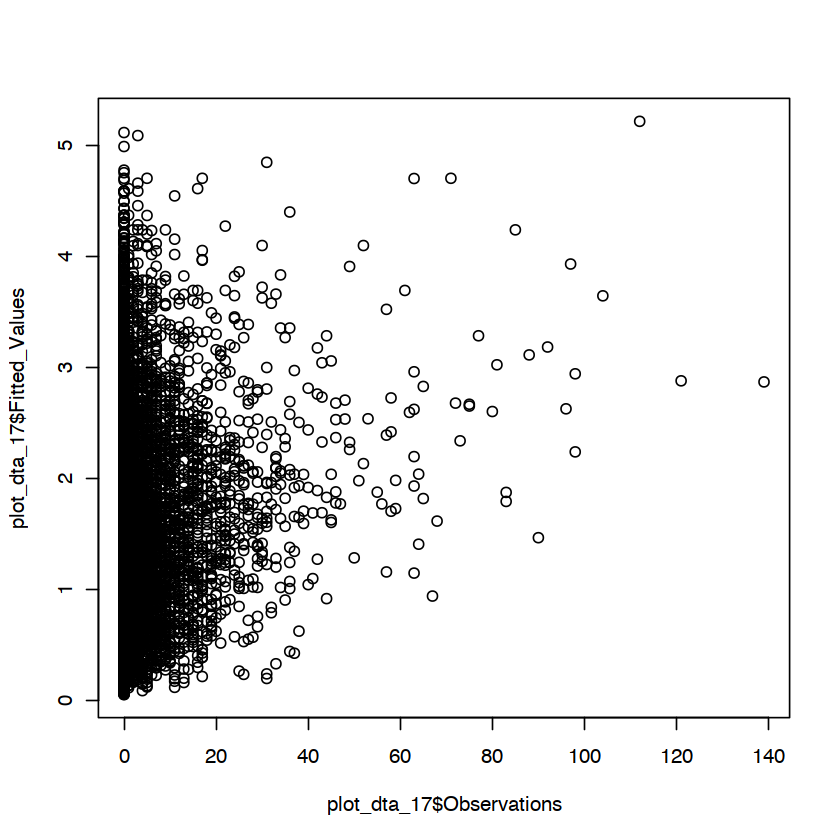

In [120]:
plot_dta_17 = data.frame("Observations" = EIA$count, "Fitted_Values" = step.poisOffOD.updated$fitted.values)
#plot(EIA$count, step.poisOff)
#ggplot(data = plot_dta_17, aes(x = Observations, y = Fitted_Values)) + 
#  geom_point()+geom_abline(intercept=0,slope=1,color="red")

plot(plot_dta_17$Observations, plot_dta_17$Fitted_Values)

#plot_dta_17$Fitted_Values

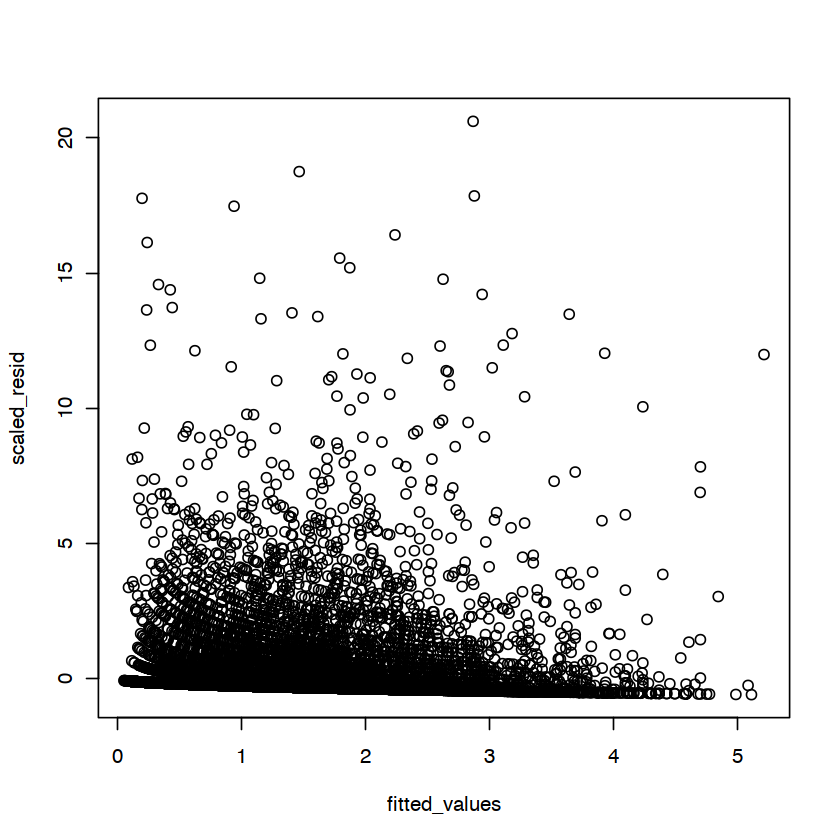

In [131]:
library(ggplot2)
phi_hat <- summary(step.poisOffOD.updated)$dispersion
fitted_values <- fitted(step.poisOffOD.updated)
res_raw <- residuals(step.poisOffOD.updated)
scaled_resid <- (EIA$count-fitted_values)/sqrt(phi_hat*fitted_values)
plot(fitted_values, scaled_resid)


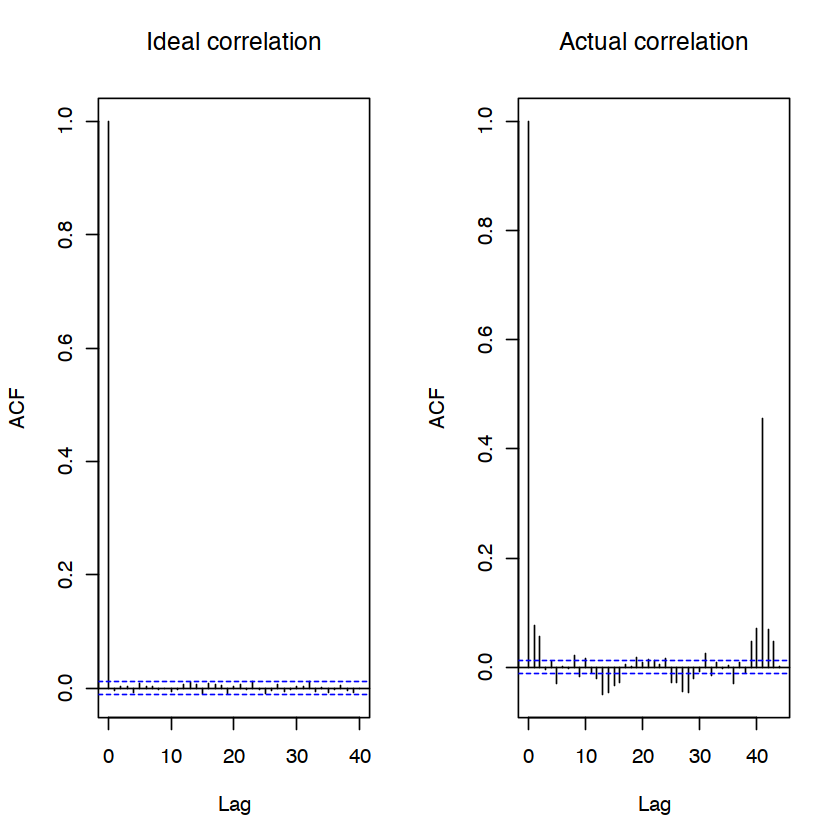

In [132]:
par(mfrow =c(1,2))
set.seed(5)
acf(rnorm(length(scaled_resid)), lag.max = 40, main = "Ideal correlation")
acf(scaled_resid, main = "Actual correlation")

In [133]:
summary(step.poisOffOD.updated)


Call:
glm(formula = count ~ tidestate + observationhour + MonthOfYear + 
    Year + x.pos + y.pos, family = quasipoisson, data = EIA, 
    offset = log(area))

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-3.199  -1.664  -1.293  -0.829  28.398  

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      2.288e+00  1.776e-01  12.882  < 2e-16 ***
tidestateFLOOD  -2.834e-02  5.420e-02  -0.523  0.60109    
tidestateSLACK   2.546e-01  5.374e-02   4.737 2.18e-06 ***
observationhour -1.040e-01  7.553e-03 -13.766  < 2e-16 ***
MonthOfYear2     3.759e-01  1.144e-01   3.287  0.00101 ** 
MonthOfYear3     1.684e-01  1.203e-01   1.399  0.16168    
MonthOfYear4    -1.887e-01  1.572e-01  -1.201  0.22991    
MonthOfYear5    -2.087e-01  1.622e-01  -1.286  0.19830    
MonthOfYear6    -2.242e-01  1.651e-01  -1.358  0.17451    
MonthOfYear7    -1.762e-01  1.761e-01  -1.001  0.31694    
MonthOfYear8     7.763e-02  1.688e-01   0.460  0.64554    
MonthOfYear9 